# Détection des transactions frauduleuses des cartes de crédit

## Utilisation du framework Scikit-Learn pour l'apprentissage automatique en Python

### Importation des classes nécessaires pour le projet

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec



# Séparer les données en deux ensembles pour l'entrainement et le test
from sklearn.model_selection import train_test_split

# Modèles
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
#from sklearn.model_selection import GridSearchCV

# Outils de visualisation
from sklearn import tree
from IPython.display import Image as img
from sklearn.tree import export_graphviz
import pydot
import graphviz

# Afficher les scores
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

---

### Fichier de données

### Lecture du fichier de données

In [2]:
data = pd.read_csv("C:/Users/Moham/Desktop/AI Project/creditcard.csv")

### Informations sur les données

In [3]:
print(data.shape)

(284807, 31)


In [4]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

### Informations sur les caractéristiques des transactions

In [7]:
features = data.iloc[:,0:31].columns

C:\Users\Moham\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Moham\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


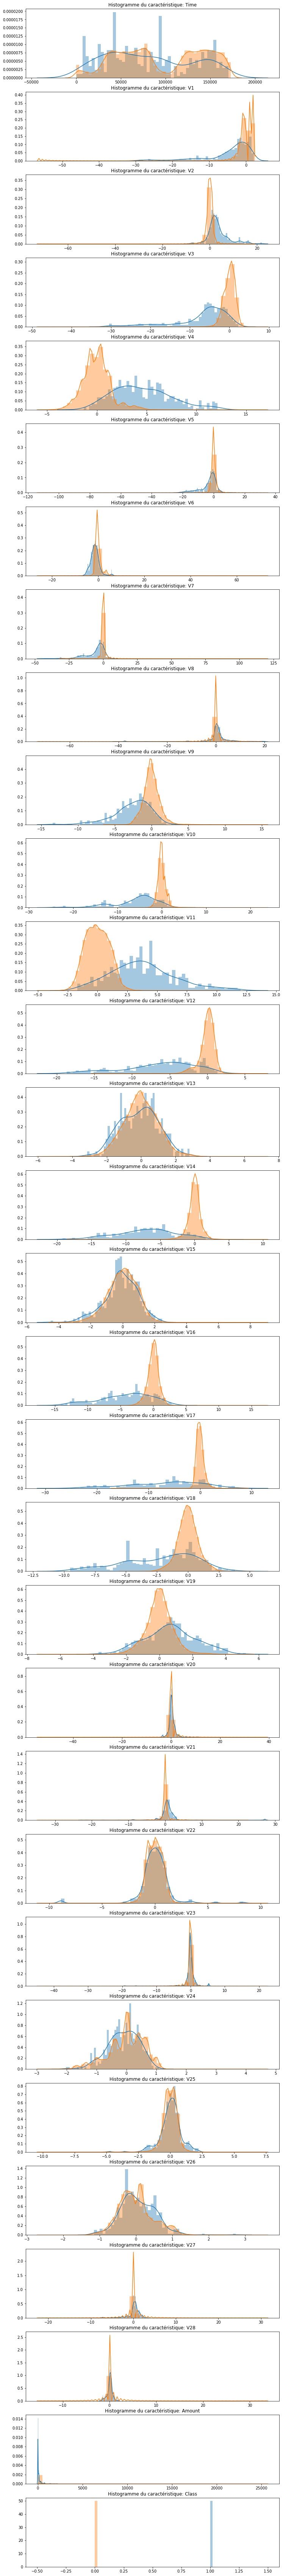

In [8]:
plt.figure(figsize=(12,31*4))

gs = gridspec.GridSpec(31, 1)

for i, c in enumerate(data[features]):
 ax = plt.subplot(gs[i])
 sns.distplot(data[c][data.Class == 1], bins=50)
 sns.distplot(data[c][data.Class == 0], bins=50)
 ax.set_xlabel("")
 ax.set_title("Histogramme du caractéristique: " + str(c))

plt.show()

In [9]:
Fraud = data[data["Class"] == 1]
Valid = data[data["Class"] == 0]

print("Nombre de cas de frauds: {}".format(len(data[data["Class"] == 1])))
print("Nombre de cas de transactions valides: {}".format(len(data[data["Class"] == 0])))

outlier_fraction = len(Fraud)/float(len(Valid))
print("\nPourcentage des données fraudes: {:.2%}".format(outlier_fraction))

Nombre de cas de frauds: 492
Nombre de cas de transactions valides: 284315

Pourcentage des données fraudes: 0.17%


In [10]:
print("Détails des transactions frauduleuses:")
Fraud.Amount.describe()

Détails des transactions frauduleuses:


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
print("Détails des transactions valides:")
Valid.Amount.describe()

Détails des transactions valides:


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

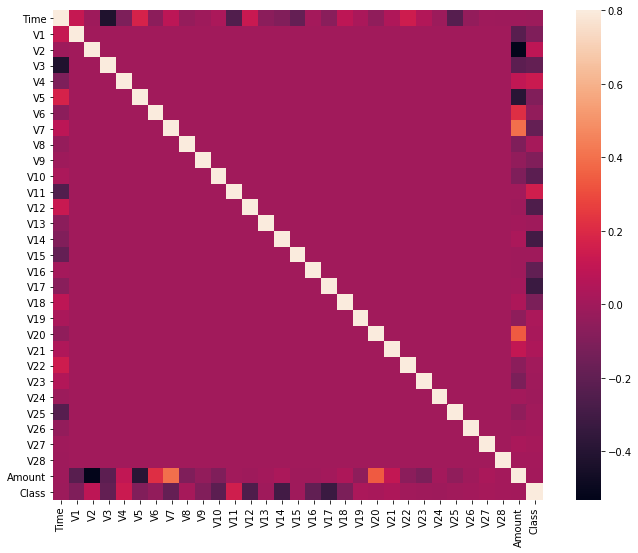

In [12]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)

plt.show()

In [13]:
X=data.drop(["Class"], axis=1)
Y=data["Class"]

print(X.shape)
print(Y.shape)

#getting just the values for the sake of processing (its a numpy array with no columns)
X_data=X.values
Y_data=Y.values

(284807, 30)
(284807,)


### Séparation des données pour l'entraînement et la prédiction

In [14]:
# Séparer les données en deux ensembles pour l'entrainement et le test
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

---

## Modèle Forêt d'Isolement

### Manipulations et prédictions

In [15]:
ifc=IsolationForest(max_samples=len(X_train), contamination=outlier_fraction, random_state=0)

ifc.fit(X_train)

# prédictions
#scores_pred = ifc.decision_function(X_train)
y_pred = ifc.predict(X_test)

In [16]:
# Changer les valeurs de prédiction à 0 pour valide et à 1 pour fraude
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

#n_errors = (y_pred != Y_test).sum()
#print(n_errors)

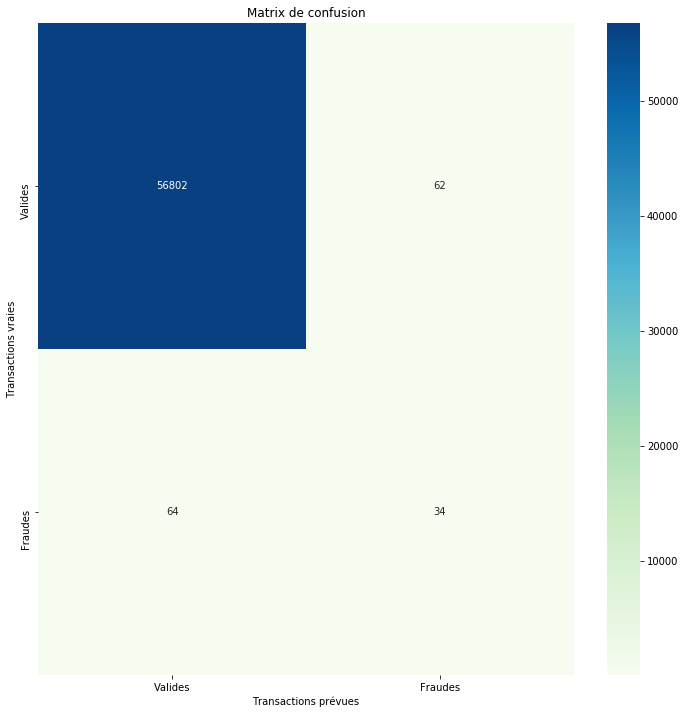

In [17]:
# Afficher la matrix de confusion
LABELS = ["Valides", "Fraudes"]
conf_matrix = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap=plt.cm.GnBu);

plt.title("Matrix de confusion")
plt.ylabel("Transactions vraies")
plt.xlabel("Transactions prévues")

plt.show()

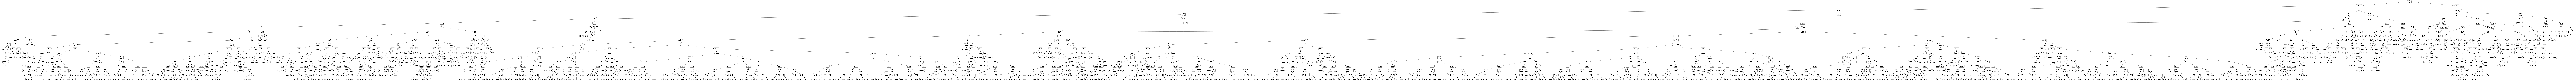

In [18]:
# Visualiser la prise de décision
feature_list = list(X.columns)

# Chercher un arbre de la forêt
tree = ifc.estimators_[5]
export_graphviz(tree, out_file = "IsolationForestTree.dot", feature_names = feature_list, rounded = True, precision = 1)

# Utiliser un fichier dot pour générer une image
(graph, ) = pydot.graph_from_dot_file("IsolationForestTree.dot")
graph.write_png('IsolationForestTree.png')

# Afficher l'image png dans jupyter notebook
display(img(graph.create_png()))

In [19]:
n_outliers = len(Fraud)
print("Le modèle utiliser est Forêt d'Isolement")

acc= accuracy_score(Y_test,y_pred)
print("L'éxactitude est de {:.2%}".format(acc))

prec= precision_score(Y_test,y_pred)
print("La précision est de {:.2%}".format(prec))

rec= recall_score(Y_test,y_pred)
print("Le rappel est de {:.2%}".format(rec))

f1= f1_score(Y_test,y_pred)
print("Le Score-F1 est de {:.2%}".format(f1))

MCC=matthews_corrcoef(Y_test,y_pred)
print("Le coefficient de corrélation de Matthews (MCC) est de {:.2%}".format(MCC))

n_outliers = len(Fraud)
n_errors = (y_pred != Y_test).sum()

print("\nDonnées de fraudes: {}".format(n_outliers))
print("Données de fraudes pas pris en compte (doit être 0): {}".format(n_errors))

#print("\n Score prédit: {}".format(scores_pred))

Le modèle utiliser est Forêt d'Isolement
L'éxactitude est de 99.78%
La précision est de 35.42%
Le rappel est de 34.69%
Le Score-F1 est de 35.05%
Le coefficient de corrélation de Matthews (MCC) est de 34.94%

Données de fraudes: 492
Données de fraudes pas pris en compte (doit être 0): 126


---

### L'éxactitude vs la précision

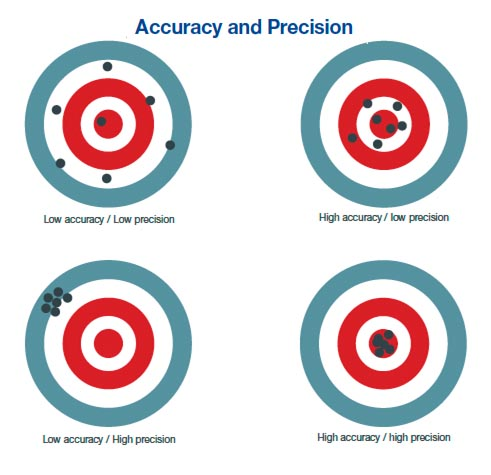

In [20]:
img(filename="C:/Users/Moham/Desktop/AI Project/accuracy vs precise board.jpg")

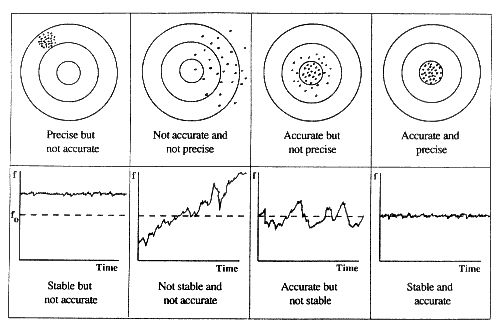

In [21]:
img(filename="C:/Users/Moham/Desktop/AI Project/accuracy vs precise.gif")

---

## Modèle Forêt Aléatoire

In [22]:
# Modèle de forêt aléatorie
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,Y_train)

# prédictions
y_pred = rfc.predict(X_test)

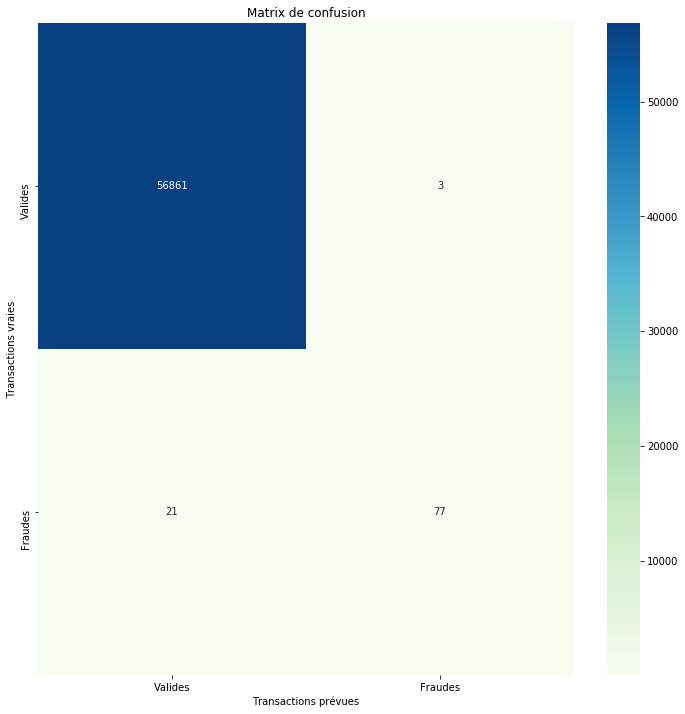

In [23]:
# Afficher la matrix de confusion
LABELS = ["Valides", "Fraudes"]
conf_matrix = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap=plt.cm.GnBu);

plt.title("Matrix de confusion")
plt.ylabel("Transactions vraies")
plt.xlabel("Transactions prévues")

plt.show()

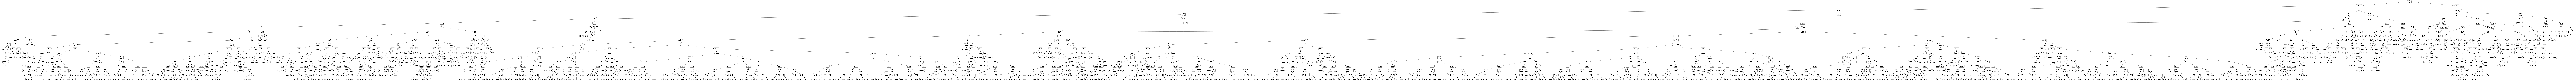

In [24]:
# Visualiser la prise de décision
feature_list = list(X.columns)

# Chercher un arbre de la forêt
tree = ifc.estimators_[5]
export_graphviz(tree, out_file = "RandomForestTree.dot", feature_names = feature_list, rounded = True, precision = 1)

# Utiliser un fichier dot pour générer une image
(graph, ) = pydot.graph_from_dot_file("RandomForestTree.dot")
graph.write_png('RandomForestTree.png')

# Afficher l'image png dans jupyter notebook
display(img(graph.create_png()))

In [25]:
n_outliers = len(Fraud)
print("Le modèle utiliser est Forêt Aléatoire")

acc= accuracy_score(Y_test,y_pred)
print("L'éxactitude est de {:.2%}".format(acc))

prec= precision_score(Y_test,y_pred)
print("La précision est de {:.2%}".format(prec))

rec= recall_score(Y_test,y_pred)
print("Le rappel est de {:.2%}".format(rec))

f1= f1_score(Y_test,y_pred)
print("Le Score-F1 est de {:.2%}".format(f1))

MCC=matthews_corrcoef(Y_test,y_pred)
print("Le coefficient de corrélation de Matthews (MCC) est de {:.2%}".format(MCC))

n_outliers = len(Fraud)
n_errors = (y_pred != Y_test).sum()

print("\nDonnées de fraude: {}".format(n_outliers))
print("Données de fraudes pas pris en compte (doit être 0): {}".format(n_errors))

Le modèle utiliser est Forêt Aléatoire
L'éxactitude est de 99.96%
La précision est de 96.25%
Le rappel est de 78.57%
Le Score-F1 est de 86.52%
Le coefficient de corrélation de Matthews (MCC) est de 86.94%

Données de fraude: 492
Données de fraudes pas pris en compte (doit être 0): 24


---

## Modèle Arbre de Décision

In [26]:
# Modèle d'arbre de décision
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,Y_train)

# prédictions
y_pred = dtc.predict(X_test)

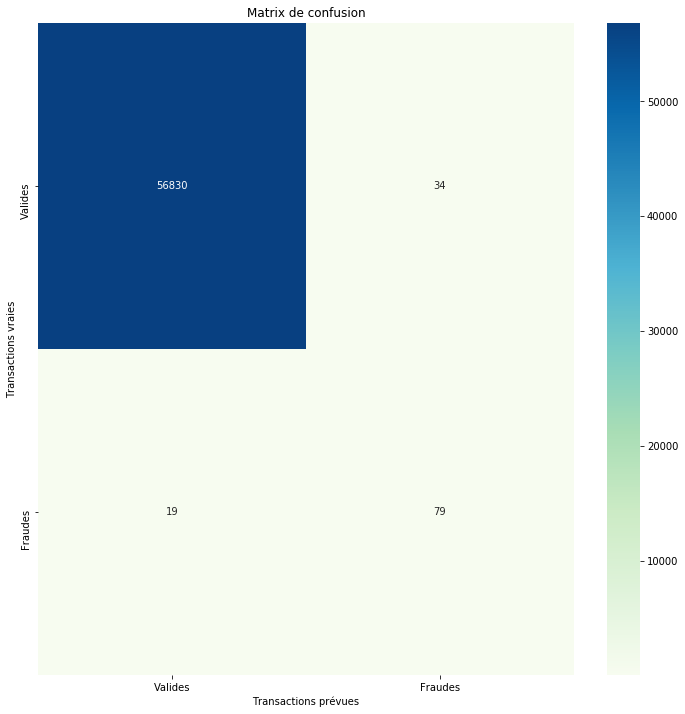

In [27]:
# Afficher la matrix de confusion
LABELS = ["Valides", "Fraudes"]
conf_matrix = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap=plt.cm.GnBu);

plt.title("Matrix de confusion")
plt.ylabel("Transactions vraies")
plt.xlabel("Transactions prévues")

plt.show()

In [28]:
#tree.plot_tree(dtc)  

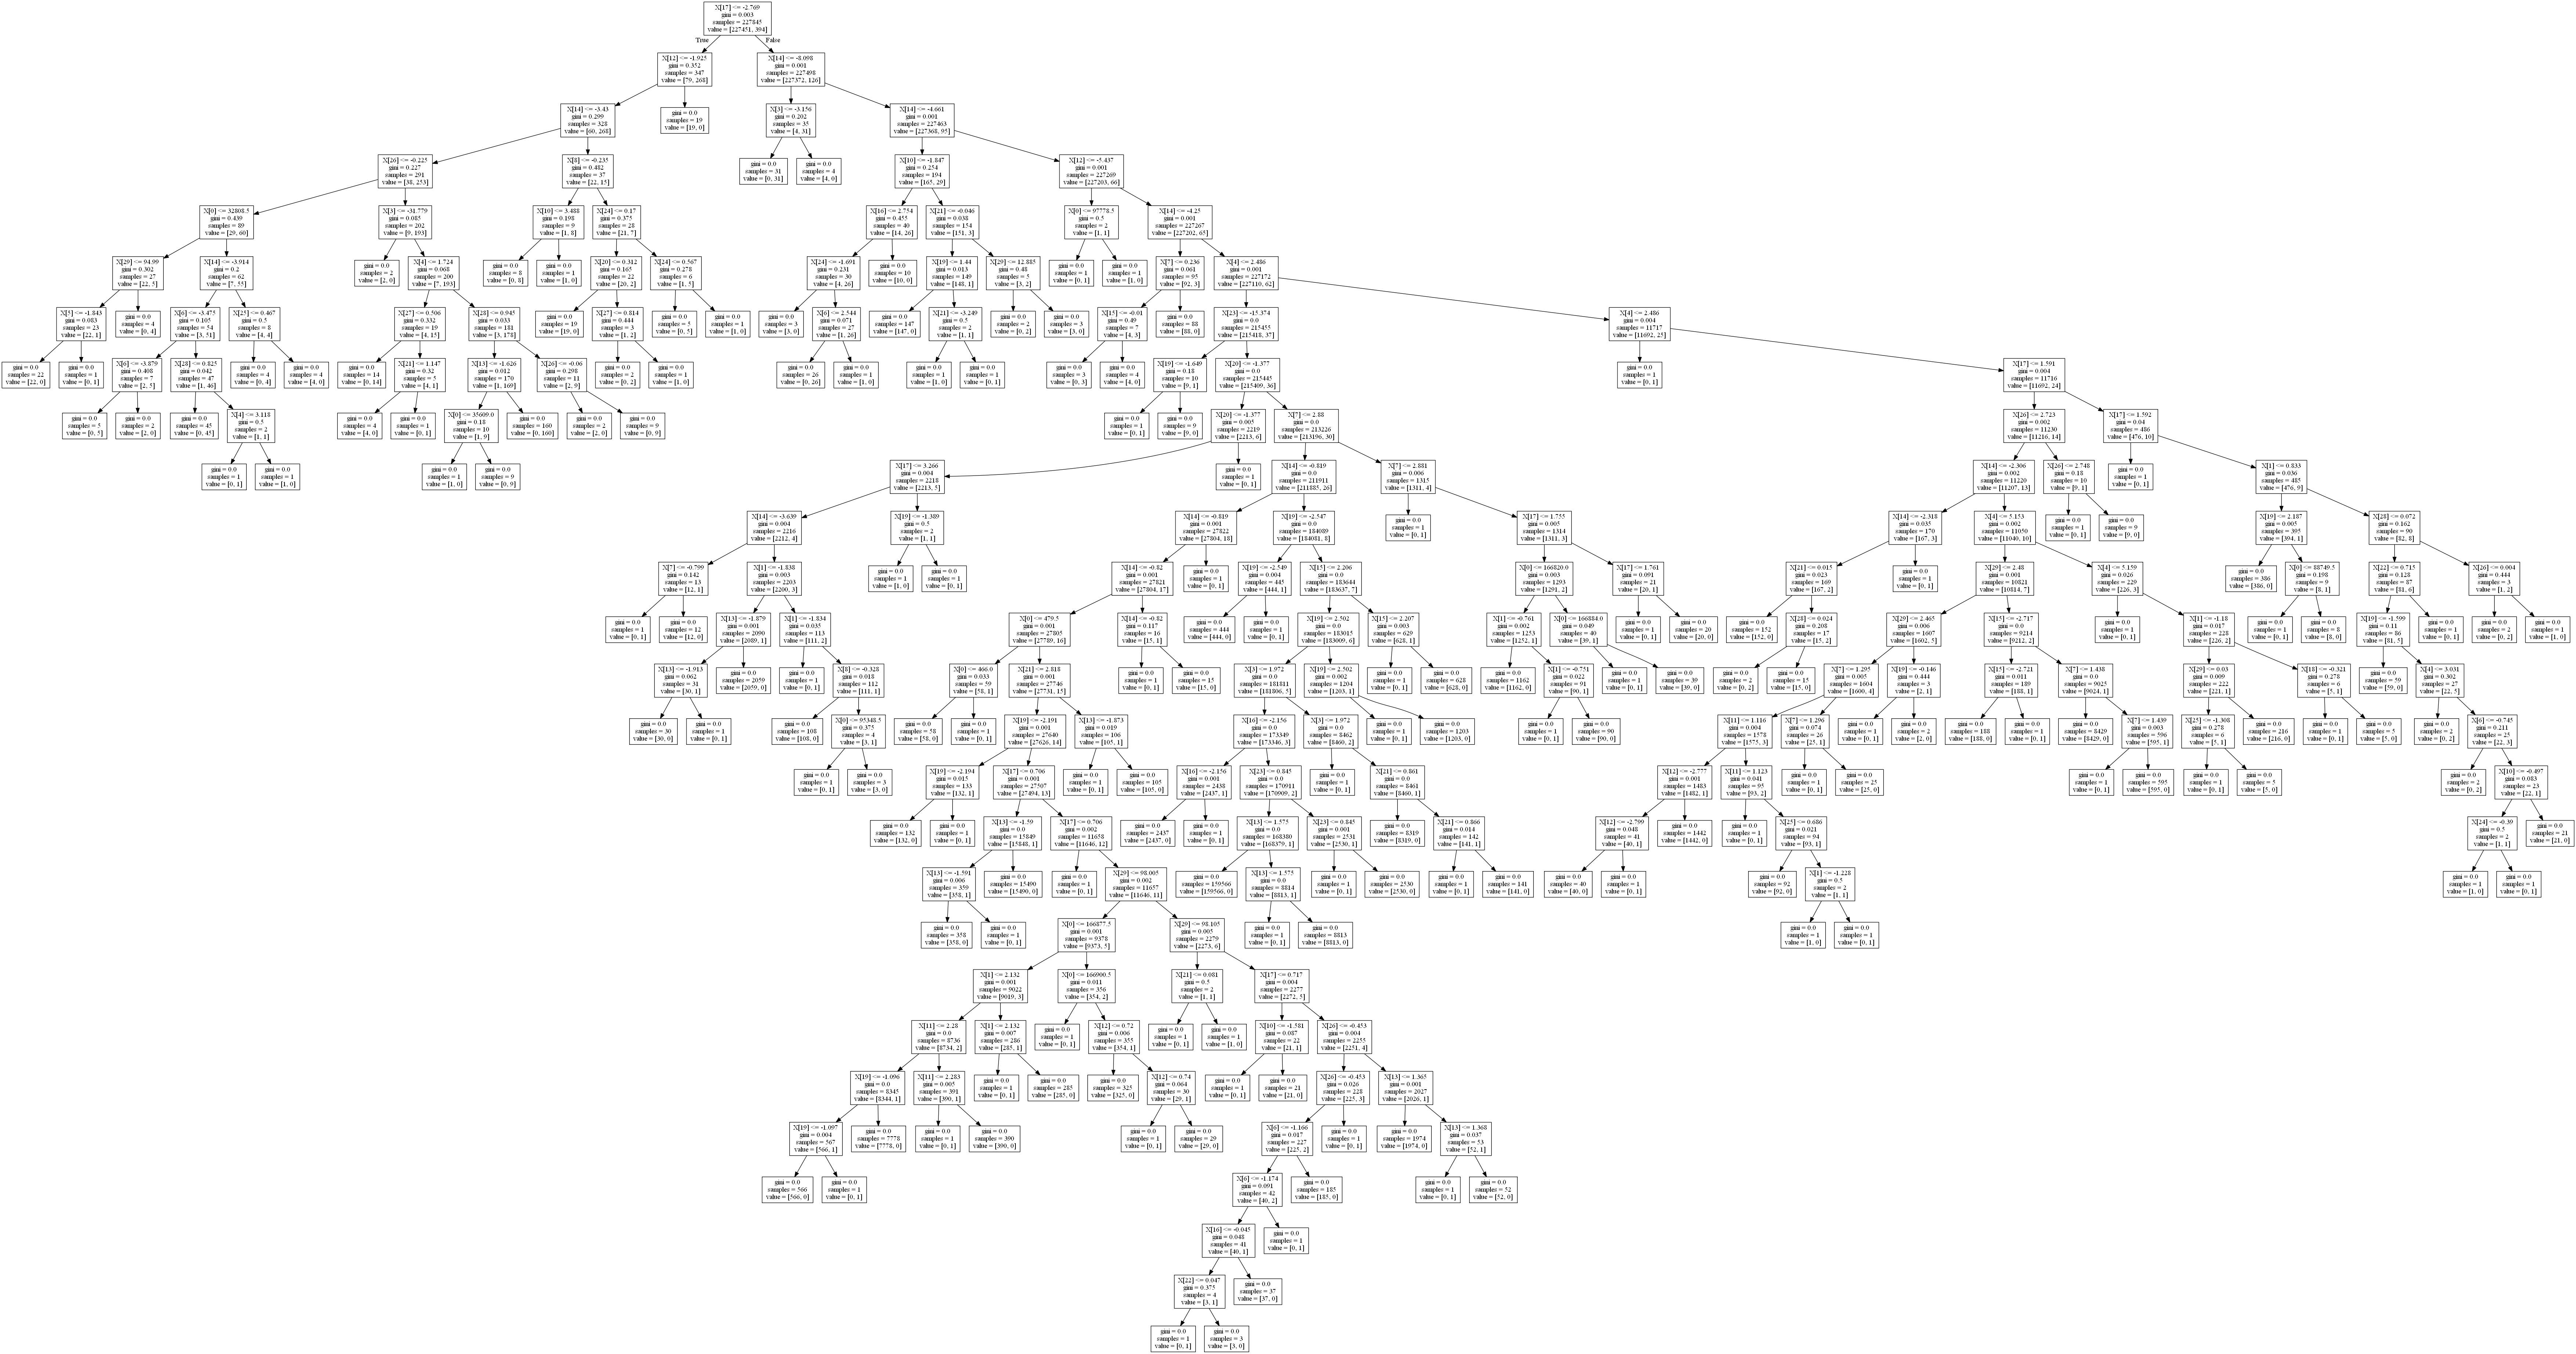

In [31]:
# Visualiser la prise de décision

# Écrire dans un fichier dot
dot_data = tree.export_graphviz(dtc, out_file="DecisionTree.dot") 

#graph = graphviz.Source(dot_data) 
#graph.render("DecisionTree") 
#graph.draw("DecisionTree.png") 

# Utiliser un fichier dot pour générer une image
(graph, ) = pydot.graph_from_dot_file("DecisionTree.dot")
graph.write_png('DecisionTree.png')

# Afficher l'image png dans jupyter notebook
display(img(graph.create_png()))

In [32]:
n_outliers = len(Fraud)
print("Le modèle utiliser est Forêt Aléatoire")

acc= accuracy_score(Y_test,y_pred)
print("L'éxactitude est de {:.2%}".format(acc))

prec= precision_score(Y_test,y_pred)
print("La précision est de {:.2%}".format(prec))

rec= recall_score(Y_test,y_pred)
print("Le rappel est de {:.2%}".format(rec))

f1= f1_score(Y_test,y_pred)
print("Le Score-F1 est de {:.2%}".format(f1))

MCC=matthews_corrcoef(Y_test,y_pred)
print("Le coefficient de corrélation de Matthews (MCC) est de {:.2%}".format(MCC))

n_outliers = len(Fraud)
n_errors = (y_pred != Y_test).sum()

print("\nDonnées de fraude: {}".format(n_outliers))
print("Données de fraudes pas pris en compte (doit être 0): {}".format(n_errors))

Le modèle utiliser est Forêt Aléatoire
L'éxactitude est de 99.91%
La précision est de 69.91%
Le rappel est de 80.61%
Le Score-F1 est de 74.88%
Le coefficient de corrélation de Matthews (MCC) est de 75.03%

Données de fraude: 492
Données de fraudes pas pris en compte (doit être 0): 53


---

## Modèle de Réseau de Neurones artificiels

In [33]:
mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100,), random_state=0)
mlp.fit(X_train,Y_train)

# prédictions
y_pred = mlp.predict(X_test)

C:\Users\Moham\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


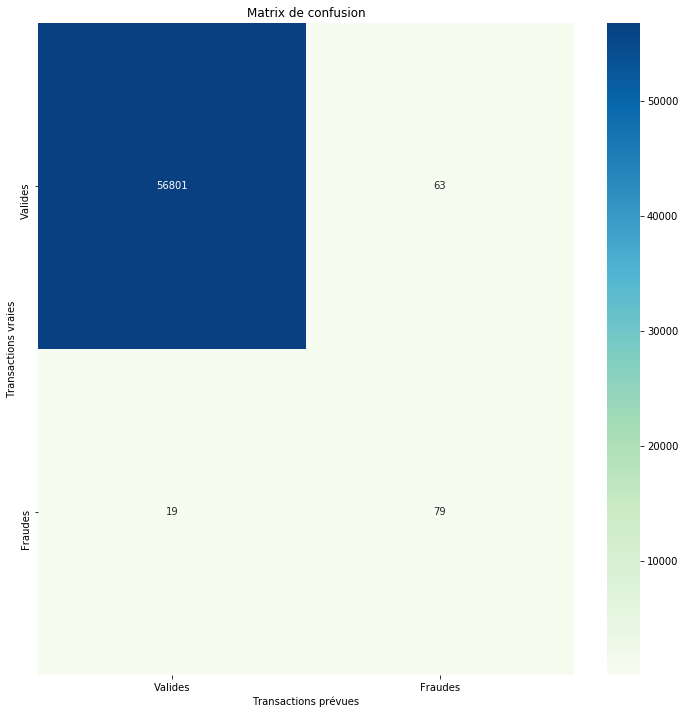

In [34]:
# Afficher la matrix de confusion
LABELS = ["Valides", "Fraudes"]
conf_matrix = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap=plt.cm.GnBu);

plt.title("Matrix de confusion")
plt.ylabel("Transactions vraies")
plt.xlabel("Transactions prévues")

plt.show()

In [35]:
n_outliers = len(Fraud)
print("Le modèle utiliser est Réseau de Neurones artificiels")

acc= accuracy_score(Y_test,y_pred)
print("L'éxactitude est de {:.2%}".format(acc))

prec= precision_score(Y_test,y_pred)
print("La précision est de {:.2%}".format(prec))

rec= recall_score(Y_test,y_pred)
print("Le rappel est de {:.2%}".format(rec))

f1= f1_score(Y_test,y_pred)
print("Le Score-F1 est de {:.2%}".format(f1))

MCC=matthews_corrcoef(Y_test,y_pred)
print("Le coefficient de corrélation de Matthews (MCC) est de {:.2%}".format(MCC))

n_outliers = len(Fraud)
n_errors = (y_pred != Y_test).sum()

print("\nDonnées de fraude: {}".format(n_outliers))
print("Données de fraudes pas pris en compte (doit être 0): {}".format(n_errors))

Le modèle utiliser est Réseau de Neurones artificiels
L'éxactitude est de 99.86%
La précision est de 55.63%
Le rappel est de 80.61%
Le Score-F1 est de 65.83%
Le coefficient de corrélation de Matthews (MCC) est de 66.90%

Données de fraude: 492
Données de fraudes pas pris en compte (doit être 0): 82


---

### Modèle de Réseau de Neurones artificiels profond

In [36]:
'''
mlp = MLPClassifier(random_state=0)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

dmlp = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
'''

dmlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100, 100, 100), random_state=0)

dmlp.fit(X_train,Y_train)

# prédictions
y_pred = dmlp.predict(X_test)

C:\Users\Moham\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [37]:
# prédictions
#y_pred = dmlp.predict(X_test)
#print(y_pred)

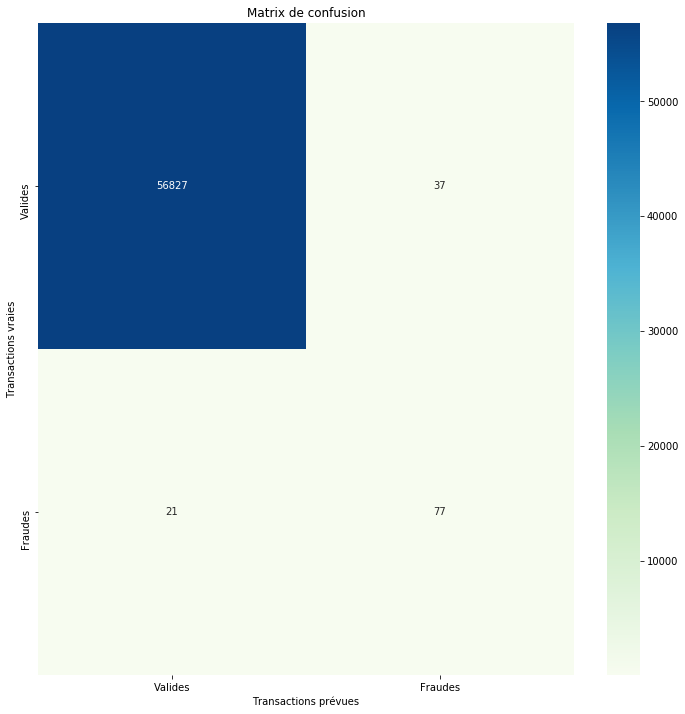

In [38]:
# Afficher la matrix de confusion
LABELS = ["Valides", "Fraudes"]
conf_matrix = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", cmap=plt.cm.GnBu);

plt.title("Matrix de confusion")
plt.ylabel("Transactions vraies")
plt.xlabel("Transactions prévues")

plt.show()

In [39]:
n_outliers = len(Fraud)
print("Le modèle utiliser est Réseau de Neurones artificiels profond")

acc= accuracy_score(Y_test,y_pred)
print("L'éxactitude est de {:.2%}".format(acc))

prec= precision_score(Y_test,y_pred)
print("La précision est de {:.2%}".format(prec))

rec= recall_score(Y_test,y_pred)
print("Le rappel est de {:.2%}".format(rec))

f1= f1_score(Y_test,y_pred)
print("Le Score-F1 est de {:.2%}".format(f1))

MCC=matthews_corrcoef(Y_test,y_pred)
print("Le coefficient de corrélation de Matthews (MCC) est de {:.2%}".format(MCC))

n_outliers = len(Fraud)
n_errors = (y_pred != Y_test).sum()

print("\nDonnées de fraude: {}".format(n_outliers))
print("Données de fraudes pas pris en compte (doit être 0): {}".format(n_errors))

Le modèle utiliser est Réseau de Neurones artificiels profond
L'éxactitude est de 99.90%
La précision est de 67.54%
Le rappel est de 78.57%
Le Score-F1 est de 72.64%
Le coefficient de corrélation de Matthews (MCC) est de 72.80%

Données de fraude: 492
Données de fraudes pas pris en compte (doit être 0): 58


---

## Résultat des modèles des autres chercheurs

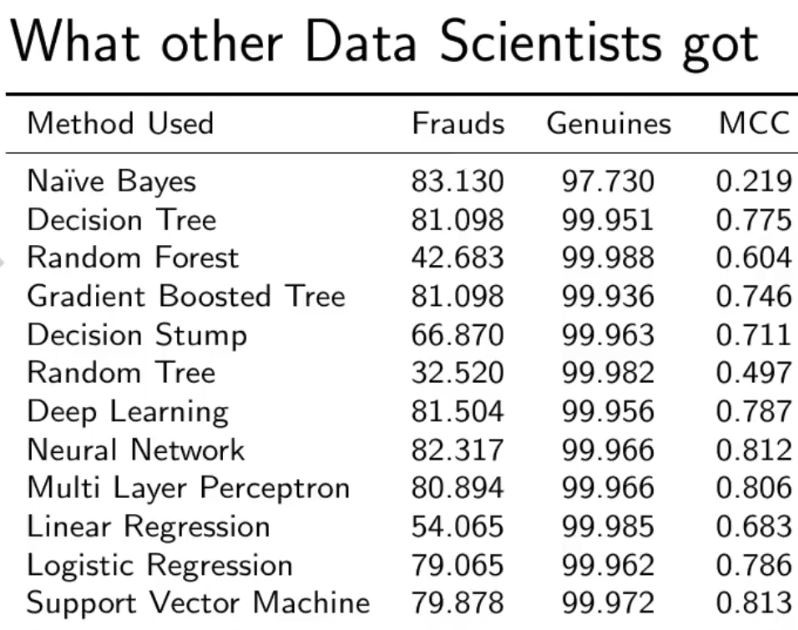

In [40]:
img(filename="C:/Users/Moham/Desktop/AI Project/Models from researchers.jpeg")